# Logistic Regression on Chronic Kidney Disease Dataset


In [20]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Step 2: Load Dataset
df = pd.read_csv("kidney_disease.csv")



In [4]:
# Step 3: Basic Exploration
print("Shape:", df.shape)
print("\nInfo:")
df.info()
print("\nMissing Values:")
print(df.isnull().sum())



Shape: (400, 26)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc         

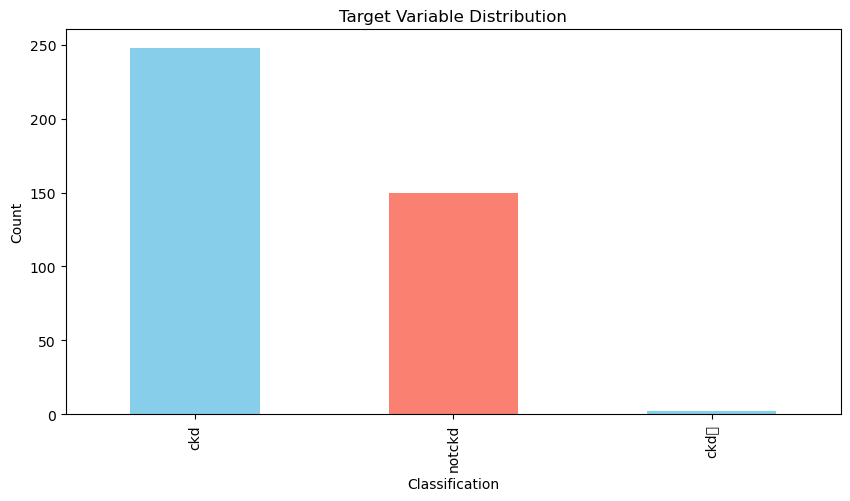

In [5]:
# Step 4: Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 5))
df['classification'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Target Variable Distribution")
plt.xlabel("Classification")
plt.ylabel("Count")
plt.show()

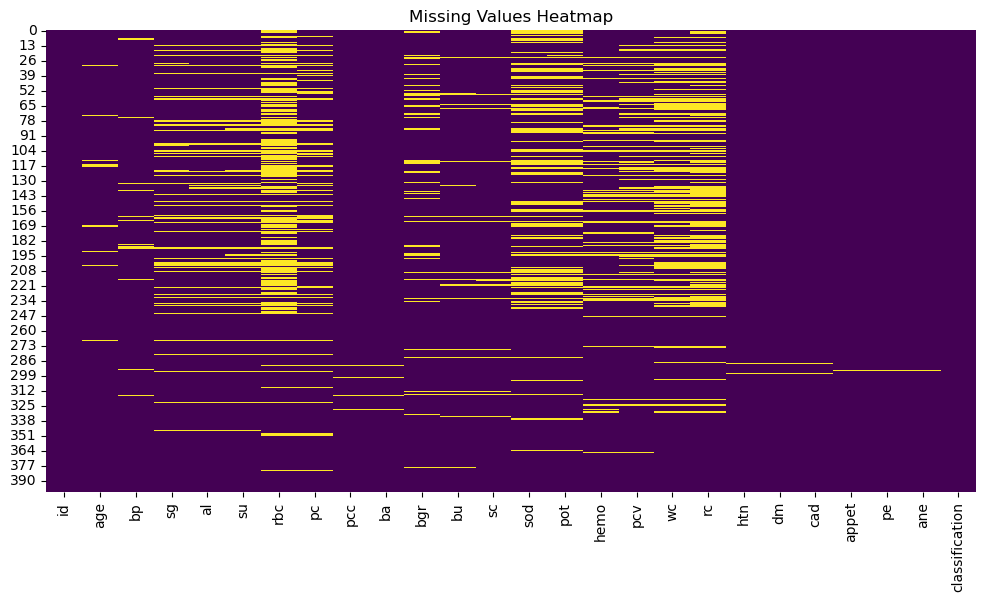

In [6]:
# Replace '?' with NaN for further EDA
df = df.replace("?", np.nan)
df = df.apply(lambda x: pd.to_numeric(x, errors='ignore'))

# Missing value heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


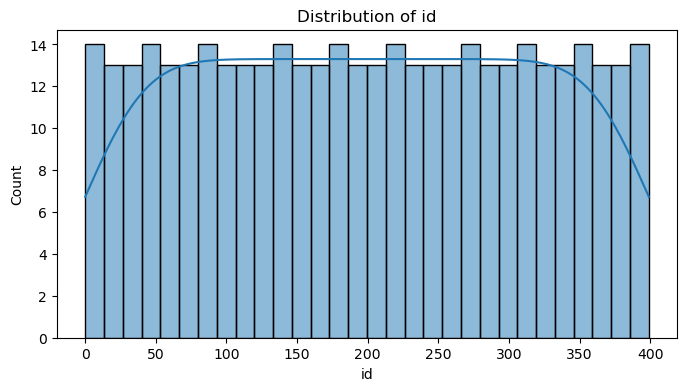

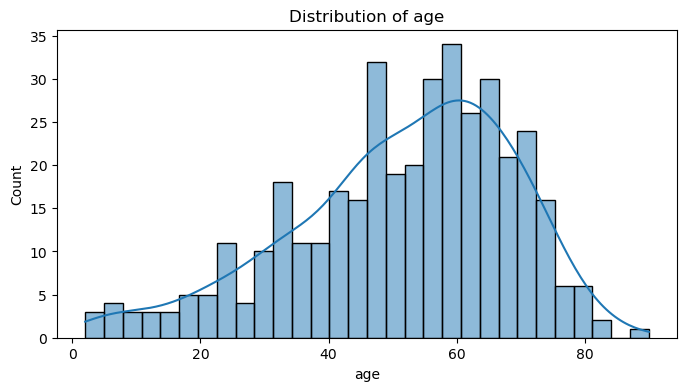

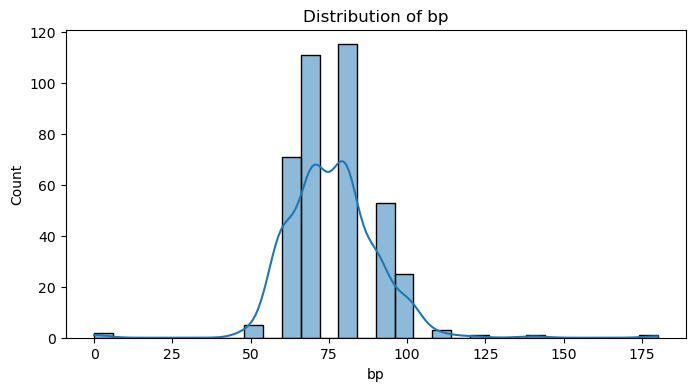

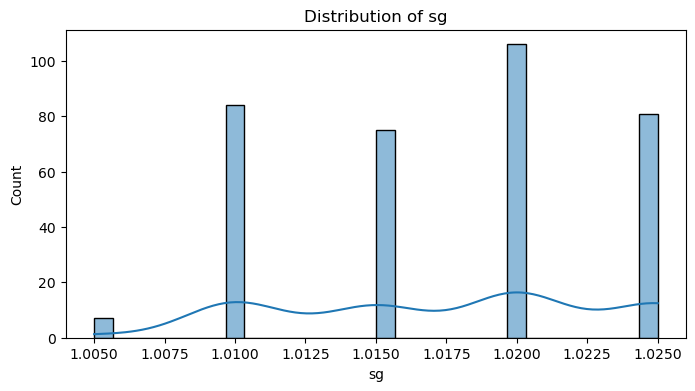

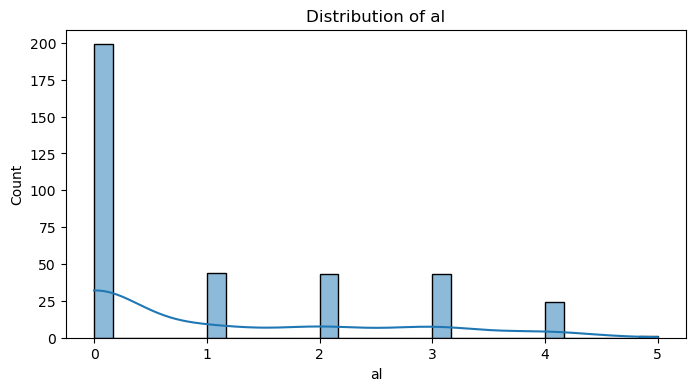

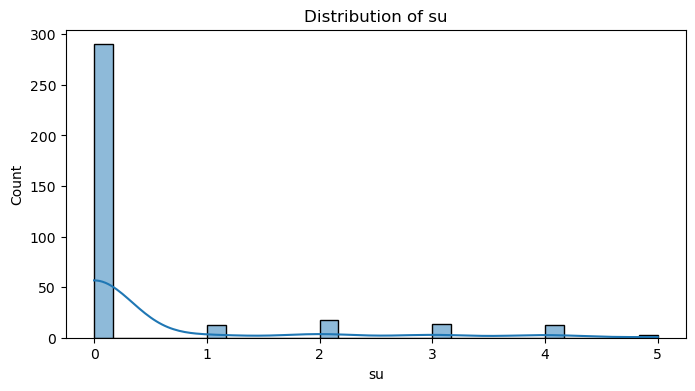

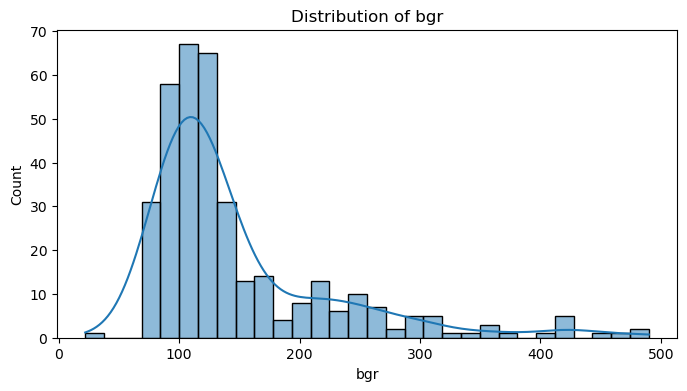

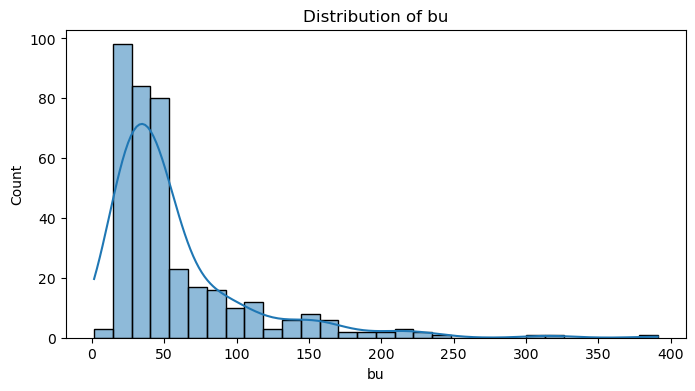

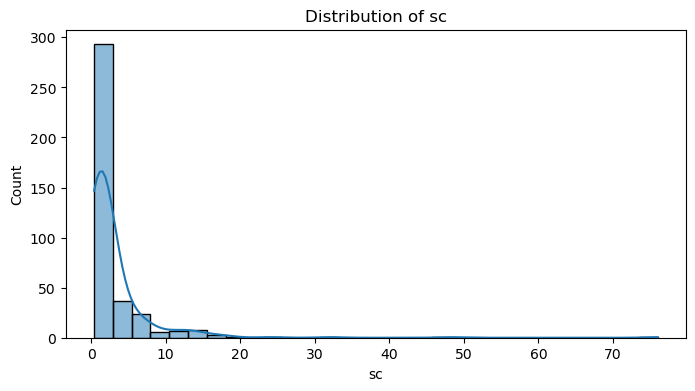

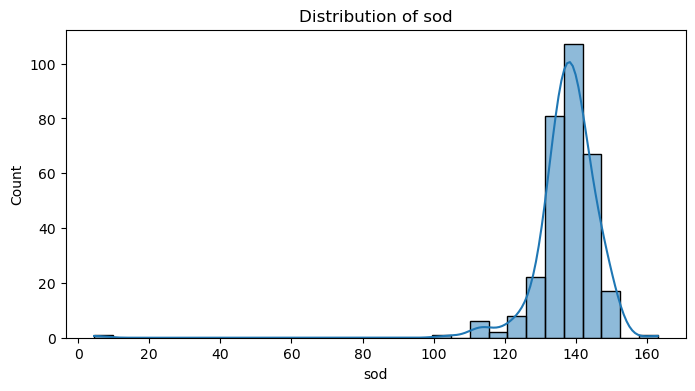

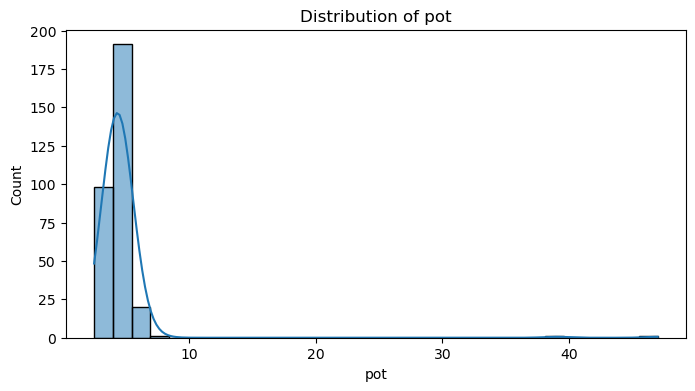

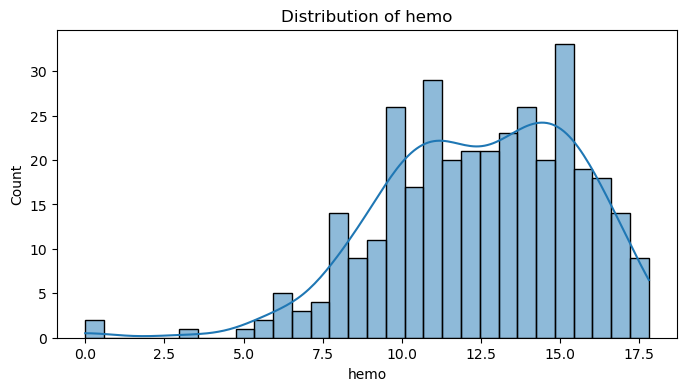

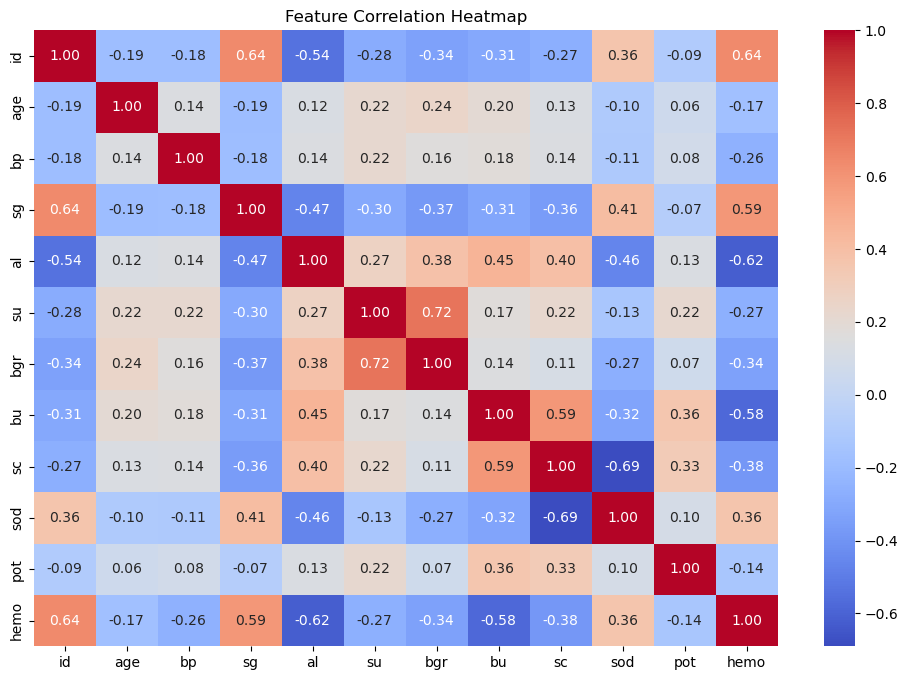

In [7]:
# Univariate distribution of numerical features
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

# Correlation Heatmap (for numeric features only)
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [8]:
# Step 5: Data Cleaning
# Drop rows with too many missing values
df = df.dropna(thresh=len(df.columns) - 5)

# Fill missing values
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

# Encode target variable
df['classification'] = df['classification'].apply(lambda x: 1 if x == 'ckd' else 0)

# Encode categorical variables
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [9]:
# Step 6: Feature and Target Split
X = df.drop('classification', axis=1)
y = df['classification']



In [10]:
# Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)



In [11]:
# Step 8: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [12]:
# Step 9: Model Training
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [13]:
# Step 10: Predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]




In [14]:
# Step 11: Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))



Confusion Matrix:
 [[29  1]
 [ 0 38]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.97      1.00      0.99        38

    accuracy                           0.99        68
   macro avg       0.99      0.98      0.99        68
weighted avg       0.99      0.99      0.99        68

ROC AUC Score: 0.9868421052631579


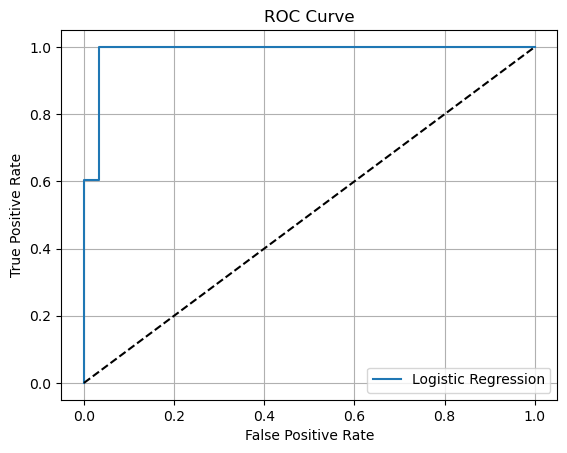

In [15]:
# Step 12: ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

In [16]:
# Step 13: Coefficient Interpretation
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0],
    'Odds Ratio': np.exp(model.coef_[0])
})
print("\nCoefficients and Odds Ratios:\n")
print(coefficients.sort_values(by='Odds Ratio', ascending=False))




Coefficients and Odds Ratios:

   Feature  Coefficient  Odds Ratio
4       al     1.111930    3.040221
23      pe     1.081166    2.948116
10     bgr     0.734206    2.083827
12      sc     0.445364    1.561058
18      rc     0.431689    1.539856
9       ba     0.317976    1.374343
5       su     0.293214    1.340730
11      bu     0.271686    1.312175
2       bp     0.228761    1.257042
21     cad     0.215371    1.240322
19     htn     0.186692    1.205255
20      dm     0.145825    1.156993
22   appet     0.093267    1.097755
8      pcc     0.087078    1.090982
14     pot    -0.048437    0.952717
17      wc    -0.150314    0.860438
16     pcv    -0.239780    0.786801
1      age    -0.246861    0.781249
13     sod    -0.441315    0.643190
6      rbc    -0.460542    0.630942
24     ane    -0.656248    0.518794
7       pc    -0.766271    0.464743
3       sg    -1.311432    0.269434
15    hemo    -1.444503    0.235863
0       id    -1.998618    0.135522


In [17]:
# Step 14: Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
print("\nCross-Validated ROC AUC Scores:", cv_scores)
print("Mean AUC:", np.mean(cv_scores))




Cross-Validated ROC AUC Scores: [0.98421053 1.         1.         0.9990991  1.        ]
Mean AUC: 0.9966619250829776


In [18]:
# Step 15: Optional Hyperparameter Tuning
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train_scaled, y_train)
print("\nBest Parameters from GridSearch:", grid.best_params_)




Best Parameters from GridSearch: {'C': 0.1}


In [19]:
# Retrain best model
best_model = grid.best_estimator_
best_model.fit(X_train_scaled, y_train)
best_pred = best_model.predict(X_test_scaled)
print("\nFinal Model Accuracy:", best_model.score(X_test_scaled, y_test))


Final Model Accuracy: 0.9852941176470589
